<a href="https://colab.research.google.com/github/abhiruchipatilbhagat/ML-basic-codes/blob/main/digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [68]:
data = pd.read_csv('train.csv')

In [69]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [71]:
Y_train

array([1, 1, 9, ..., 0, 0, 8])

In [72]:
X_train[:, 0].shape

(784,)

In [73]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [74]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [81]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 7000)

Iteration:  0
[8 8 3 ... 1 4 4] [1 1 9 ... 0 0 8]
0.07639024390243902
Iteration:  10
[3 3 3 ... 1 0 6] [1 1 9 ... 0 0 8]
0.2066341463414634
Iteration:  20
[3 3 3 ... 1 0 6] [1 1 9 ... 0 0 8]
0.30217073170731706
Iteration:  30
[3 3 3 ... 1 0 6] [1 1 9 ... 0 0 8]
0.3542682926829268
Iteration:  40
[1 3 3 ... 1 0 6] [1 1 9 ... 0 0 8]
0.39975609756097563
Iteration:  50
[1 1 3 ... 0 0 6] [1 1 9 ... 0 0 8]
0.4531707317073171
Iteration:  60
[1 1 3 ... 0 0 6] [1 1 9 ... 0 0 8]
0.5183658536585366
Iteration:  70
[1 1 9 ... 0 0 6] [1 1 9 ... 0 0 8]
0.5654878048780487
Iteration:  80
[1 1 9 ... 0 0 6] [1 1 9 ... 0 0 8]
0.5950243902439024
Iteration:  90
[1 1 9 ... 0 0 6] [1 1 9 ... 0 0 8]
0.6195853658536585
Iteration:  100
[1 1 9 ... 0 0 8] [1 1 9 ... 0 0 8]
0.6407317073170732
Iteration:  110
[1 1 9 ... 0 0 8] [1 1 9 ... 0 0 8]
0.6591951219512195
Iteration:  120
[1 1 4 ... 0 0 8] [1 1 9 ... 0 0 8]
0.6751219512195122
Iteration:  130
[1 1 4 ... 0 0 8] [1 1 9 ... 0 0 8]
0.688560975609756
Iteration:  140

In [77]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [1]
Label:  1


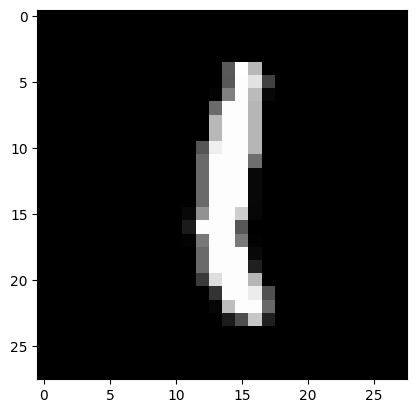

Prediction:  [1]
Label:  1


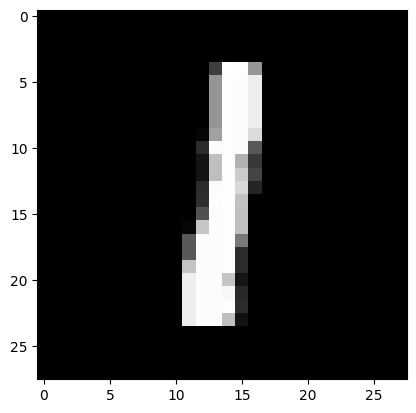

Prediction:  [9]
Label:  9


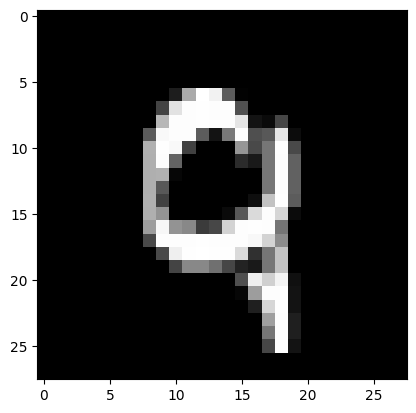

Prediction:  [5]
Label:  5


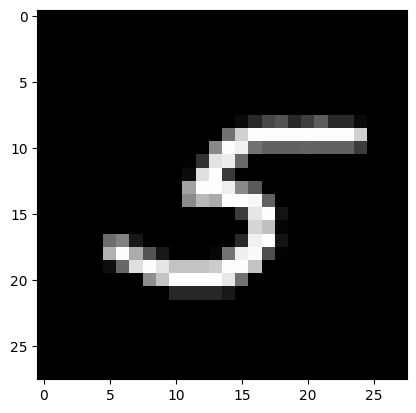

Prediction:  [4]
Label:  4


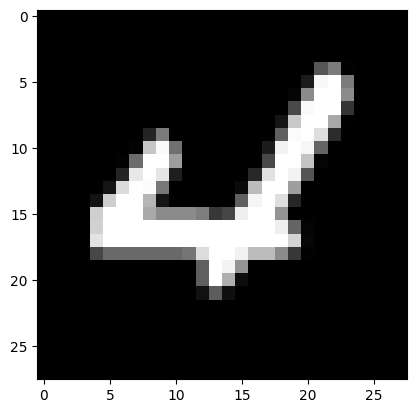

Prediction:  [3]
Label:  3


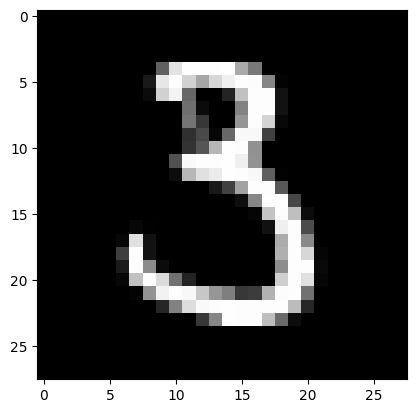

Prediction:  [5]
Label:  5


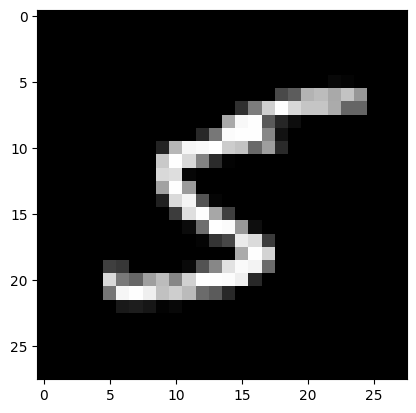

Prediction:  [8]
Label:  8


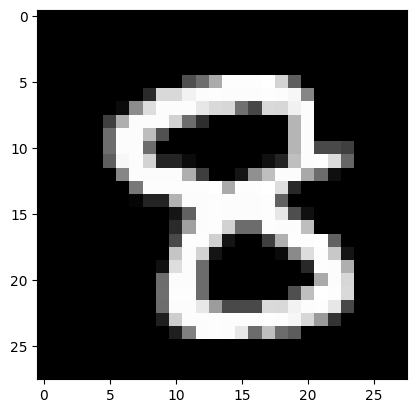

In [79]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)
test_prediction(5, W1, b1, W2, b2)
test_prediction(6, W1, b1, W2, b2)
test_prediction(7, W1, b1, W2, b2)

In [80]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 6 6 9 3 8 3 9 2 7 9 9 5 1 3 4 4 6 4 4 8 0 5 7 7 3 7 9 3 1 1 0 5 3 2 5 7
 1 3 5 6 4 2 6 0 5 2 9 8 8 6 4 7 7 1 1 8 8 4 9 8 1 0 4 0 2 4 8 4 9 1 2 6 4
 4 1 9 3 0 0 2 7 9 4 0 3 3 3 1 2 8 6 0 1 1 2 1 3 5 6 9 7 9 4 3 2 4 9 2 3 6
 2 3 1 9 7 7 9 1 0 1 0 3 6 8 6 0 9 2 6 4 2 1 1 4 7 2 3 6 6 0 2 6 3 0 7 8 5
 2 9 7 4 0 9 5 5 1 4 6 8 0 0 3 1 6 8 1 0 8 3 1 5 8 1 2 8 6 7 4 4 2 6 8 7 7
 4 8 3 4 2 6 6 0 8 4 0 9 6 4 2 5 0 8 1 1 7 7 9 0 0 6 0 8 6 7 7 0 0 9 8 9 1
 4 9 9 6 6 5 3 5 7 3 7 0 0 9 3 2 6 6 8 6 7 6 9 3 1 8 6 3 6 1 6 3 9 1 2 0 7
 3 7 8 4 8 0 2 1 6 1 2 5 9 1 4 1 7 3 5 8 9 6 7 9 5 6 1 3 6 9 6 7 1 7 2 4 8
 1 2 3 1 1 4 2 7 6 1 9 0 9 9 4 8 0 3 6 6 4 0 0 9 9 1 4 5 8 4 0 8 1 2 7 7 4
 6 3 7 6 1 6 2 8 1 5 0 1 0 0 6 4 8 2 8 7 6 5 1 6 5 7 4 7 4 8 0 0 1 7 9 9 8
 8 1 3 3 4 4 1 3 9 1 1 2 1 8 4 0 6 3 6 0 9 4 0 1 7 5 1 3 9 0 3 8 2 8 8 2 0
 5 9 7 6 4 5 7 8 3 1 7 2 4 9 9 0 9 7 1 0 8 7 4 5 8 1 7 4 8 6 4 1 6 0 5 9 0
 3 0 2 0 4 9 0 7 1 8 6 0 6 7 0 0 6 8 1 4 0 2 6 5 3 5 3 0 6 1 6 0 8 5 0 8 8
 3 5 4 5 6 4 4 5 6 1 9 0 

0.912